# Gunting Batu Kertas

Tugas dari kelas Dicoding   
https://www.dicoding.com/academies/184/

## Submission Detail


Selamat, Anda telah berada di akhir pembelajaran dalam akademi ini. .Anda sudah mempelajari dasar-dasar machine learning dan bagaimana jaringan saraf bekerja. Untuk bisa lulus dari akademi ini, Anda akan membuat program jaringan saraf tiruan menggunakan TensorFlow. Program Anda harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.



### Kriteria
Kriteria yang harus dipenuhi pada program:
1. Dataset harus dibagi menjadi train set dan validation set.  
2. Harus mengimplementasikan augmentasi gambar.  
3. Menggunakan image data generator.  
4. Model harus menggunakan model sequential.  
5. Pelatihan model tidak melebihi waktu 30 menit.  
6. Program dikerjakan pada Google Colaboratory.  
7. Akurasi dari model minimal 85%.  
8. Dapat memprediksi gambar yang diunggah ke Colab seperti gambar di bawah.  
![gambar](https://dicodingacademy.blob.core.windows.net/academies/202004302318257ec23b834046174a7d426680e488905e.png)



### Kesempatan untuk submission Anda diterima, akan lebih besar jika:

- Akurasi dari model di atas 85%  
- Anda menggunakan lebih dari 1 hidden layer.  
- Menerapkan lebih banyak augmentasi gambar.  
- Anda menggunakan optimizer dan loss-function yang tidak diajarkan di kelas.  



### Submission Anda akan ditolak jika:
- Akurasi dari model Anda di bawah 85%.
- Proses pelatihan model Anda memakan waktu lebih dari 30 menit.




### Kriteria penilaian submission:

- **Bintang 1** : Semua ketentuan terpenuhi, namun terindikasi melakukan plagiat.
- **Bintang 2** : Semua ketentuan terpenuhi, namun penulisan kode masih perlu diperbaiki.
- **Bintang 3** : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul.
- **Bintang 4** : Semua ketentuan terpenuhi dan akurasi dari program di atas 90%.
- **Bintang 5** : Semua ketentuan terpenuhi, akurasi di atas 90%, menggunakan satu atau lebih teknik yang tidak diajarkan di modul seperti penggunaan dropout regularization, Callback, membuat plot loss dan akurasi dari model, dan sebagainya.



### Resources
Dataset yang dipakai haruslah dataset berikut ini [rockpaperscissors](https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip).



### Tips
- Model merupakan klasifikasi multi kelas sehingga loss function yang digunakan bukan binary_crossentropy.
- Pastikan Anda membagi direktori untuk image data generator sesuai dengan jumlah label.
- Untuk export project yang Anda kerjakan di Colaboratory sebagai berkas .ipynb, klik tombol file yang berada di pojok kiri atas Colaboratory dan pilih download .ipynb.

## Preparation

Proses pembuatan model machine learning untuk klasifikasi bentuk tangan akan diawali dengan persiapan data. Dataset akan kita download dan ekstrak, kemudian akan kita tamplkan contoh gambarnya.

### Import module
Ada beberapa modul yang kita gunakan dalam notebook ini. Ada modul untuk koneksi ke Google Drive, pandas&numpy, tensorflow, dan matplotlib. Lebih detailnya dapat dilihat pada keterangan di bawah ini.

In [1]:
# Import modules

# Koneksi ke google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("TensorFlow version: " + tf.__version__)

# Buat gambar
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

TensorFlow version: 2.2.0


Using TensorFlow backend.


Sambungkan notebook ini dengan akun google drive saya.

In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Download dan Ekstrak dataset

Pada bagian ini tidak digunakan kode Python, tapi cukup dengan menggunakan perintah di Linux (di awali dengan tanda seru).


In [3]:
# Download dataset dengan menggunakan command linux 'wget'
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-06-05 08:24:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.00MB/s    in 44s     

2020-06-05 08:25:34 (7.01 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# Ekstrak file yang sudah di-download menggunakan command linux 'unzip'
# File rockpaperscissors.zip diekstrak ke dalam folder dataset
!unzip rockpaperscissors.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: dataset/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: dataset/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: dataset/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: dataset/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: dataset/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: dataset/rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: dataset/__MACOSX/r

In [5]:
# Cek isi folder dataset sudah diekstrak menggunakan command linux 'ls'
!ls dataset/

__MACOSX  rockpaperscissors


In [6]:
# Cek isi folder dataset/rockpaperscissors
!ls dataset/rockpaperscissors

paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


In [7]:
# Ada file readme, buka dengan menggunakan command linux 'fold' agar lebih rapi
# Alternatifnya, biasa digunakan command 'cat'
!fold -w 80 -s dataset/rockpaperscissors/README_rpc-cv-images.txt

AUTHOR: Julien de la Bruère-Terreault (drgfreeman@tuta.io)

LICENSE: CC-BY-SA 4.0

DESCRIPTION: This dataset contains images of hand gestures from the 
Rock-Paper-Scissors game. The images were captured as part of a hobby project 
where I developped a Rock-Paper-Scissors game using computer vision and machine 
learning on the Raspberry Pi (https://github.com/DrGFreeman/rps-cv)

CONTENTS: The dataset contains a total of 2188 images corresponding to the 
'Rock' (726 images), 'Paper' (710 images) and 'Scissors' (752 images) hand 
gestures of the Rock-Paper-Scissors game. All image are taken on a green 
background with relatively consistent ligithing and white balance.

FORMAT: All images are RGB images of 300 pixels wide by 200 pixels high in .png 
format. The images are separated in three sub-folders named 'rock', 'paper' and 
'scissors' according to their respective class.



In [8]:
# Hapus file dan folder yang tidak dibutuhkan, kemudian cek lagi isi foldernya
!rm dataset/rockpaperscissors/README_rpc-cv-images.txt 
!rm -rf dataset/rockpaperscissors/rps-cv-images
!ls dataset/rockpaperscissors/

paper  rock  scissors


### Cek kondisi gambarnya

Pada bagian ini, akan dibentuk generator gambar dan akan kita lihat contoh gambarnya. Referensi kode yang digunakan dari dokumentasi resmi  
https://www.tensorflow.org/tutorials/keras/classification  
https://www.tensorflow.org/tutorials/load_data/images  



In [0]:
# Atur parameter

VALIDATION_SPLIT = 0.2
TARGET_SIZE = (200,300)
CLASS_NAMES = np.array(['paper','rock','scissors'])

In [11]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                                  validation_split=VALIDATION_SPLIT)
train_gen = image_generator.flow_from_directory(directory='dataset/rockpaperscissors/',
                                                batch_size=16,
                                                shuffle=True,
                                                target_size=TARGET_SIZE,
                                                classes = ['paper','rock','scissors'],
                                                subset='training')

validation_gen = image_generator.flow_from_directory(directory='dataset/rockpaperscissors/',
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=TARGET_SIZE,
                                                     classes = ['paper','rock','scissors'],
                                                     subset='validation')



Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


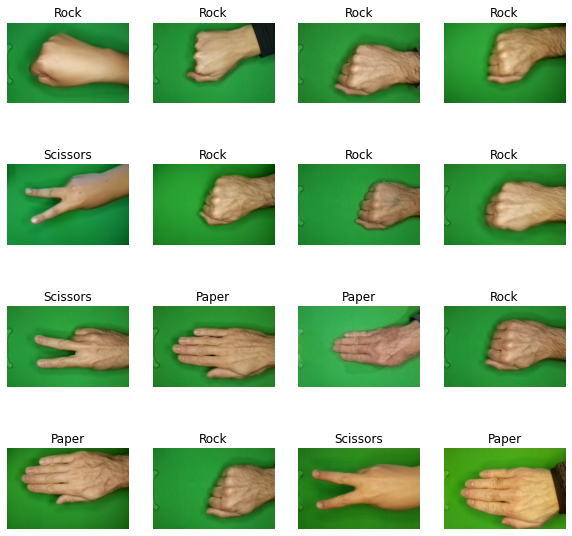

In [12]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(16):
      ax = plt.subplot(4,4,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_gen)
show_batch(image_batch, label_batch)

In [0]:
## Cara Lama (Diganti dengan cell di atas karena lebih efisien, tidak perlu 2x kerja)

# path = '/content/dataset/rockpaperscissors/'
# rock_filenames = os.listdir(path+'rock')
# paper_filenames = os.listdir(path+'paper')
# scissors_filenames = os.listdir(path+'scissors')

# plt.figure(figsize=(10,8))
# for i in range(3):
#     plt.subplot(3,3,1+i)
#     img = image.load_img(path+'rock/'+rock_filenames[i])
#     plt.title('Rock')
#     plt.imshow(img)
    
#     plt.subplot(3,3,4+i)
#     img = image.load_img(path+'paper/'+paper_filenames[i])
#     plt.title('Paper')
#     plt.imshow(img)

#     plt.subplot(3,3,7+i)
#     img = image.load_img(path+'scissors/'+scissors_filenames[i])
#     plt.title('Scissors')
#     plt.imshow(img)
# plt.show()


## Keras CNN Model 
Agar akurasi model maksimal, parameter dan layer yang digunakan mengikuti notebook milik sorindragan di Kaggle  

Sumber: https://www.kaggle.com/sorindragan/keras-classic-cnn-around-98-acc

### model creation

Deklarasi layer dan parameter model CNN yang akan digunakan.

In [14]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 33, 64)        3

### callbacks class definition
Digunakan untuk menghentikan training jika suatu kondisi sudah terpenuhi. Kondisi yang digunakan dalam kasus ini adalah loss < 0.05. Jika nilai loss sudah sangat kecil, sebaiknya proses training dihentikan karena akurasi sudah sangat tinggi. Jika dilanjutkan, ada kemungkinan akurasi akan turun.

In [0]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.05):
            print()
            print("Loss kurang dari 0.05, akurasi sudah sangat tinggi! \nTraining dihentikan...")
            self.model.stop_training = True
callbacks = callBack()

### Train the model

Membutuhkan waktu sekitar 25 detik per epoch. Model dilatih dengan batas 20 epoch, jadi waktu yang dibutuhkan maksimal sekitar 10 menit.

In [16]:
training_history = model.fit(
      train_gen,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_gen, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 25s - loss: 1.0923 - accuracy: 0.4650 - val_loss: 0.7327 - val_accuracy: 0.7375
Epoch 2/20
25/25 - 29s - loss: 0.5616 - accuracy: 0.7875 - val_loss: 0.3338 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 25s - loss: 0.3352 - accuracy: 0.8800 - val_loss: 0.3533 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 25s - loss: 0.2692 - accuracy: 0.9000 - val_loss: 0.2345 - val_accuracy: 0.9250
Epoch 5/20
25/25 - 25s - loss: 0.1946 - accuracy: 0.9284 - val_loss: 0.2525 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 24s - loss: 0.1508 - accuracy: 0.9565 - val_loss: 0.2553 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 25s - loss: 0.1359 - accuracy: 0.9625 - val_loss: 0.1508 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 24s - loss: 0.1031 - accuracy: 0.9668 - val_loss: 0.1716 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 25s - loss: 0.0690 - accuracy: 0.9700 - val_loss: 0.1198 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 25s - loss: 0.0672 - accuracy: 0.9750 - val_loss: 0.0851 - val_accuracy: 0.9625
Epoch 11/

Diperoleh akurasi model pada training sebesar 99% dan akurasi pada validasi sebesar 97.5%

### Grafik loss dan accurary per epoch
Dilihat nilai loss dan accurary pada tiap epoch. Nilai loss turun secara eksponensial dan accurary naik secara eksponensial juga.

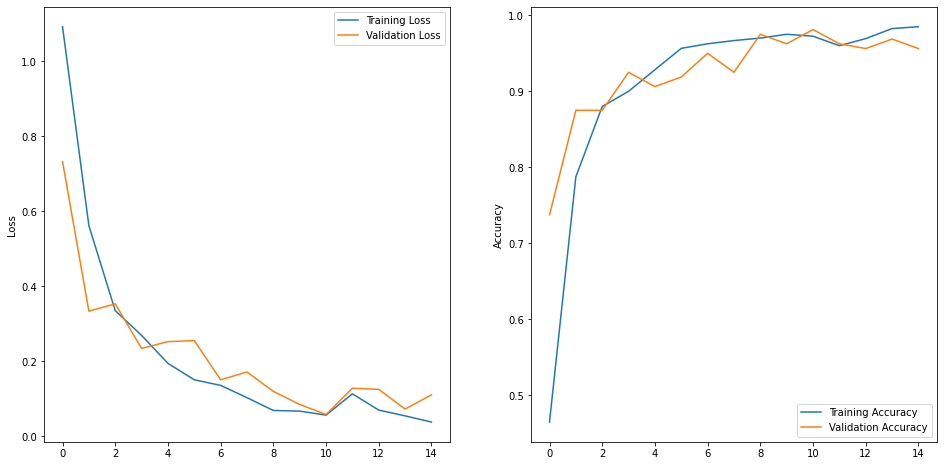

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Prediksi dengan foto baru

Saatnya menguji model yang sudah dibuat dengan foto tangan saya sendiri. Ada dua cara yang digunakan dalam notebook ini. Pertama dengan uploader, yang kedua dilakukan prediksi secara batch dengan beberapa gambar sekaligus dari google drive.

Saving 1mnAKQCHEDbtjPX2.png to 1mnAKQCHEDbtjPX2.png
1mnAKQCHEDbtjPX2.png
Prediksi:  [0. 1. 0.]
Jadi gambar tersebut adalah  rock


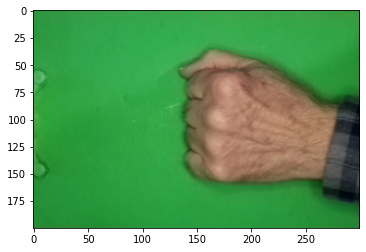

In [19]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(200,300))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
   
    images = np.vstack([x])
    # Add the image to a batch where it's the only member.
    classes = model.predict(images, batch_size=1)
    
    print(fn)
    print('Prediksi: ', classes[0])
    prediksi_max = np.argmax(classes[0])
    print('Jadi gambar tersebut adalah ',CLASS_NAMES[prediksi_max])
